In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [2]:
import sys
sys.path.append('..')
from grav_waves import *

In [3]:
FONTSIZE = 20
FIGSIZE = 10

In [4]:
# Cost file information
event_name = 'GW170817'
#event_name = 'GW200115_042309'
ifo = 'L1'
cds = 'm1m2'
Ns = 2 * [256]

In [5]:
cost_file = f'../cost_values/cost_values__{event_name}__{ifo}__{cds}__Ns_{Ns[0]}_{Ns[1]}.h5'

In [6]:
# Information required to generate new cost file
input_path_strain = f'txt_data/{event_name}_strain_{ifo}.txt'
input_path_psd = f'txt_data/{event_name}_psd_{ifo}.txt'

# For event GW170817
m1_signal = 1.3758 # Msol
m2_signal = 1.3758 # Msol
tc_signal = 170.710205078125 # seconds
min_mass = [1,1] # Msol
max_mass = [5,5] # Msol

# For event GW200115_042309
#m1_signal = 7.58110 # Msol
#m2_signal = 1.32952 # Msol
#tc_signal = 166.696533203125 # seconds
#min_mass = [5,1] # Msol
#max_mass = [9,5] # Msol

In [7]:
if not os.path.exists(cost_file):
    print('Cost file does not exist.')
    print('Generating cost function values...')
    write_cost_values(cost_file, input_path_strain, input_path_psd, cds, 
                      Ns, m1_signal, m2_signal, tc_signal, min_mass, max_mass)
    print('Done.')

In [8]:
hf = h5py.File(cost_file, 'r')

C = hf['cost_values'][...]
cd1_grid = hf['cd1'][...]
cd2_grid = hf['cd2'][...]
cd1_signal = hf['cd1_signal'][...]
cd2_signal = hf['cd2_signal'][...]

hf.close()

In [9]:
if cds == 'm1m2':
    cd1_label = r'$m_1 / M_\odot$'
    cd2_label = r'$m_2 / M_\odot$'
elif cds == 'theta1eta':
    cd1_label = r'$\theta_1$'
    cd2_label = r'$\eta$'
else:
    cd1_label = 'Coordinate 1'
    cd2_label = 'Coordinate 2'

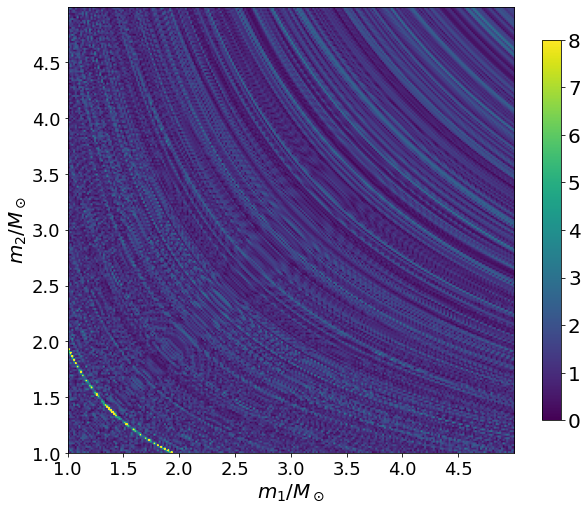

In [10]:
fig, ax = plt.subplots(figsize=(FIGSIZE,FIGSIZE))

extent = (min(cd1_grid), max(cd1_grid), min(cd2_grid), max(cd2_grid))
aspect = (max(cd1_grid) - min(cd1_grid)) / (max(cd2_grid) - min(cd2_grid))
cax = ax.imshow( np.transpose(-C.reshape(Ns)), extent=extent, aspect=aspect, origin='lower', cmap='viridis' )

#ax.set_xticks(np.arange(1.0, 5.5, 0.5))
#ax.set_yticks(np.arange(1.0, 5.5, 0.5))
#ax.set_xticks(np.arange(1.0, 9, 1.0))
#ax.set_yticks(np.arange(0.14, 0.26, 0.01))
ax.tick_params(axis='both', labelsize=0.9*FONTSIZE)
ax.set_xlabel(cd1_label, fontsize=FONTSIZE)
ax.set_ylabel(cd2_label, fontsize=FONTSIZE)

cbar = fig.colorbar(cax, ax=ax, shrink=0.7)
cbar.ax.tick_params(labelsize=FONTSIZE)
cax.set_clim([0, 8])
cbar.set_ticks(np.arange(0,9,1))

#ax.plot(cd1_signal, cd2_signal, 'r.', markersize=10)

fig.savefig(f'figures/SNR__{event_name}__{ifo}__{cds}__Ns_{Ns[0]}_{Ns[1]}.pdf', format='pdf', bbox_inches='tight')

In [11]:
max(-C)

26.81995748135834